In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
##Importing libraries
import pandas as pd
import numpy as np
##Improting dataset
Ir_df=pd.read_csv('iris.csv')
##Printing 10 random rows from dataset
Ir_df.sample(n=10).head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
48,49,5.3,3.7,1.5,0.2,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
110,111,6.5,3.2,5.1,2.0,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
74,75,6.4,2.9,4.3,1.3,Iris-versicolor


## Data Pre-processing

# #Question 2 - Check if there are any missing values

In [3]:
##Checking for null values
miss=Ir_df.isnull().sum()
print(miss)
##Defining a specific data range to fill the NaN values
x=Ir_df.iloc[:,:-1]
x=x.apply(lambda x:x.fillna(x.median()))
#Dropping ID since it's just a nominal value & would just affect data for no use
x=x.drop(['Id'],axis=1)
##Printing only a value so as to show the ID column as dropped
x.head(1)

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [4]:
##Importing the dataset in an array
y = Ir_df.iloc[:,5:6]
##Importing the modules to encode the categorical variables in a numerical form
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
##Using LabelEncoder to convert the categories into numerical form
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
##Since the shape gets changed reshaping the array
y=np.reshape(y,(152,1))
##Now trying to reduce the confusion of categorical variables as (0to2) causing the model/system to detect it as numerical value & to rather make it understand the data is just a labelling
onehotencoder= OneHotEncoder(categorical_features = [0])
y = onehotencoder.fit_transform(y.astype(np.float64)).toarray()
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [5]:
#Using correlation
x.corr()

#Dropping the values in the correlation range specified
x=x.drop(['SepalLengthCm'],axis=1)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [6]:
x.var()
##Not dropping any column since the variance of each column is greater than 0.1

SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

In [7]:
import seaborn as sns
##using the value of x obtained after execution of the above code
sns.pairplot(x)

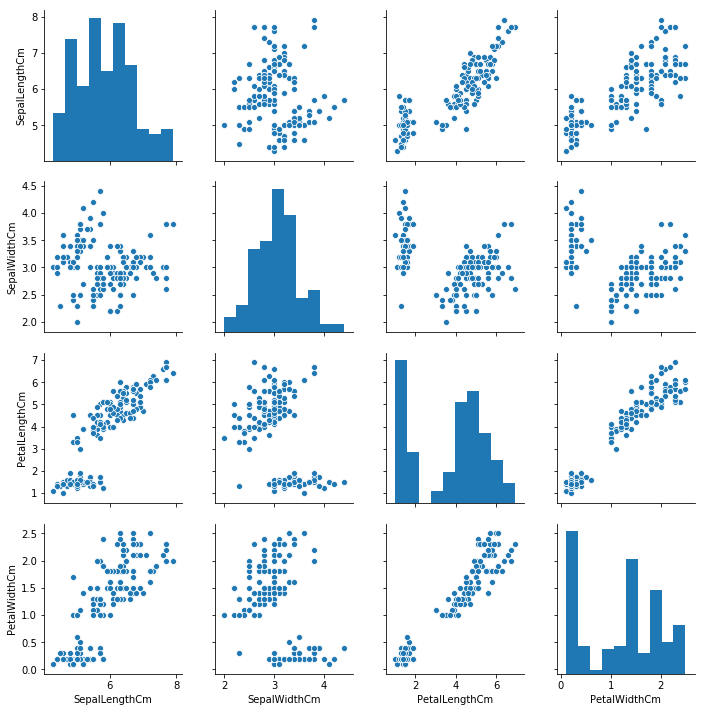

In [8]:
##The catch is once the program is executed completely & if this line is executed it'll throw an error since another x is also used at the bottom for plotting the graph, hence trying this alternative
z=Ir_df.iloc[:,1:5]
sns.pairplot(z)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print("Shape of X_train is:",X_train.shape)
print("Shape of X_test is:",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is:",y_test.shape)

Shape of X_train is: (121, 3)
Shape of X_test is: (31, 3)
Shape of y_train is: (121, 3)
Shape of y_test is: (31, 3)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [10]:
#K=3
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=3,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)

Accuracy is :0.935


In [11]:
##K=5
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=5,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)

Accuracy is :0.935


In [12]:
#K=9
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=9,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)

Accuracy is :0.935


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [13]:
K1= 1
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K1,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE1=1-scorecard
print("Misclassification error is:%.3f"%MSE1)

Accuracy is :0.903
Misclassification error is:0.097


In [14]:
K2=3
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K2,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE2=1-scorecard
print("Misclassification error is:%.3f"%MSE2)

Accuracy is :0.935
Misclassification error is:0.065


In [15]:
K3=5
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K3,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE3=1-scorecard
print("Misclassification error is:%.3f"%MSE3)

Accuracy is :0.935
Misclassification error is:0.065


In [16]:
K4=9
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K4,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE4=1-scorecard
print("Misclassification error is:%.3f"%MSE4)

Accuracy is :0.935
Misclassification error is:0.065


In [17]:
K5=12
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K5,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE5=1-scorecard
print("Misclassification error is:%.3f"%MSE5)

Accuracy is :0.935
Misclassification error is:0.065


In [18]:
K6=15
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K6,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE6=1-scorecard
print("Misclassification error is:%.3f"%MSE6)
print("This model has the lowest MSE")

Accuracy is :0.968
Misclassification error is:0.032
This model has the lowest MSE


In [20]:
K7=19
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K7,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE7=1-scorecard
print("Misclassification error is:%.3f"%MSE7)

Accuracy is :0.903
Misclassification error is:0.097


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

[1, 3, 5, 9, 12, 15, 19]
[0.09677419354838712, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.032258064516129004, 0.09677419354838712]


Text(0.5, 1.0, 'Plot of misclassification error vs k ')

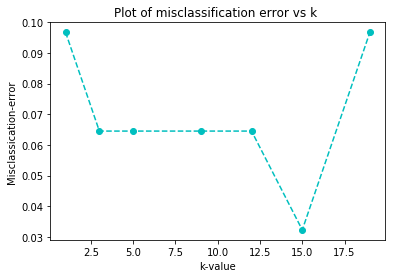

In [21]:
#Importing the MSE & K-values from the above obtained values hence this can be run only after everything above is executed first
x=[K1,K2,K3,K4,K5,K6,K7]
print(x)
y=[MSE1,MSE2,MSE3,MSE4,MSE5,MSE6,MSE7]
print(y)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,color='c',marker='o',linestyle='dashed')
plt.xlabel('k-value')
plt.ylabel('Misclassication-error')
plt.title("Plot of misclassification error vs k ")

[1, 3, 5, 9, 12, 15, 19]
[0.09677419354838712, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.032258064516129004, 0.09677419354838712]


([<matplotlib.axis.YTick at 0x20ee0902da0>,
 <a list of 7 Text yticklabel objects>)

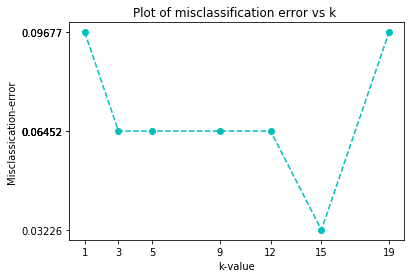

In [22]:
#Graph to show the exact values of K vs MSE
x=[K1,K2,K3,K4,K5,K6,K7]
print(x)
y=[MSE1,MSE2,MSE3,MSE4,MSE5,MSE6,MSE7]
print(y)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,color='c',marker='o',linestyle='dashed')
plt.xlabel('k-value')
plt.ylabel('Misclassication-error')
plt.title("Plot of misclassification error vs k ")
plt.xticks(x)
plt.yticks(y)